# Netflix Movies and TV Shows
## by **(Mahmoud Adel Taya Mohamed)**

## Preliminary Wrangling

> This dataset consists of tv shows and movies available on Netflix as of( 2019). The dataset is collected from Flixable which is a third-party Netflix search engine.

Dataset Source:  https://www.kaggle.com/shivamb/netflix-shows

In [177]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.stats import norm

%matplotlib inline

In [178]:
# load in the dataset into a pandas dataframe

df=pd.read_csv('netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [179]:
#Check shape of the dataset
df.shape

(6234, 12)

In [180]:
#Describe qualitative data 
df.describe()

,show_id,release_year
count,6.234000e+03,6234.00000
mean,7.670368e+07,2013.35932
std,1.094296e+07,8.81162
min,2.477470e+05,1925.00000
25%,8.003580e+07,2013.00000
50%,8.016337e+07,2016.00000
75%,8.024489e+07,2018.00000
max,8.123573e+07,2020.00000


In [181]:
#Check Data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


In [182]:
# Check null data
df.isnull().sum()

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

>>### We have some null data need Fill it

In [183]:
# Process for NaN data
#filling director which didn't have any data by add No Director
df.director.fillna("No Director", inplace=True)

#filling cast which didn't have any data by add No Cast
df.cast.fillna("No Cast", inplace=True)

#filling country which didn't have any data by add country unavailable
df.country.fillna("Country Unavailable", inplace=True)

#drop remain NaN data which we will not use in analysis
df.dropna(inplace=True)

In [184]:
#Check Null data again to confirm from our process
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [185]:
# convert time from string to datetime64
df['date_added'] = pd.to_datetime(df['date_added'])

# Extract month and day name and hour from Start Time after convert
df['added_month'] = df['date_added'].dt.month
df['added_day_name'] = df['date_added'].dt.day_name()
df['added_year'] = df['date_added'].dt.year

In [186]:
#Check Data information 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6214 entries, 0 to 6222
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   show_id         6214 non-null   int64         
 1   type            6214 non-null   object        
 2   title           6214 non-null   object        
 3   director        6214 non-null   object        
 4   cast            6214 non-null   object        
 5   country         6214 non-null   object        
 6   date_added      6214 non-null   datetime64[ns]
 7   release_year    6214 non-null   int64         
 8   rating          6214 non-null   object        
 9   duration        6214 non-null   object        
 10  listed_in       6214 non-null   object        
 11  description     6214 non-null   object        
 12  added_month     6214 non-null   int64         
 13  added_day_name  6214 non-null   object        
 14  added_year      6214 non-null   int64         
dtypes: d

>#### Check Duplicated data

In [187]:

df.duplicated().sum()

0

>>#### No duplicate data in our dataset

In [188]:
#Check first five rows from dataset
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,added_month,added_day_name,added_year
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",2019-09-09,2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,9,Monday,2019
1,80117401,Movie,Jandino: Whatever it Takes,No Director,Jandino Asporaat,United Kingdom,2016-09-09,2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,9,Friday,2016
2,70234439,TV Show,Transformers Prime,No Director,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,2018-09-08,2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob...",9,Saturday,2018
3,80058654,TV Show,Transformers: Robots in Disguise,No Director,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,2018-09-08,2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...,9,Saturday,2018
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017-09-08,2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,9,Friday,2017


In [189]:
# Creating 2 new Data frame one for moives and one for TV Show
df_movies=df.query("type=='Movie'")
df_tvshow=df.query("type=='TV Show'")
# Check Number of Movies and TV Show
print(df_movies.type.value_counts())
print(df_tvshow.type.value_counts())

Movie    4257
Name: type, dtype: int64
TV Show    1957
Name: type, dtype: int64


In [190]:
#check country with produced Movies and TV Show
df['country'].value_counts()

United States                          2023
India                                   777
Country Unavailable                     471
United Kingdom                          347
Japan                                   174
                                       ... 
Egypt, France                             1
United States, Botswana                   1
United States, Morocco                    1
Italy, France, Switzerland                1
Canada, United Kingdom, Netherlands       1
Name: country, Length: 555, dtype: int64

In [191]:
# Check Rating values
df.rating.value_counts()

TV-MA       2025
TV-14       1695
TV-PG        699
R            508
PG-13        286
NR           217
PG           184
TV-Y7        168
TV-G         149
TV-Y         142
TV-Y7-FV      95
G             37
UR             7
NC-17          2
Name: rating, dtype: int64

In [192]:
#create Dictionary for rating https://en.wikipedia.org/wiki/TV_Parental_Guidelines
rate_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

In [193]:
# create new column to add new rating acording to ages stage
df['target_ages'] = df['rating'].replace(rate_ages)
#Check unique values for new column
df['target_ages'].unique()

array(['Older Kids', 'Adults', 'Teens', 'Kids'], dtype=object)

In [194]:
#Describe Data frame which have only Movies

df_movies.describe()

,show_id,release_year,added_month,added_year
count,4.257000e+03,4257.000000,4257.000000,4257.000000
mean,7.561484e+07,2012.349307,6.746065,2017.995537
std,1.288683e+07,9.743366,3.667081,1.202765
min,2.477470e+05,1942.000000,1.000000,2008.000000
25%,7.030419e+07,2012.000000,3.000000,2017.000000
50%,8.015858e+07,2016.000000,7.000000,2018.000000
75%,8.099183e+07,2017.000000,10.000000,2019.000000
max,8.123573e+07,2020.000000,12.000000,2020.000000


>>### Noted : from 2016 to 2020 around 50% from total Movies  released and from 2018 to 2020 added 50 % of moives on netflix from total movies of netflix

In [195]:
#Describe Data frame which have only TV Shows
df_tvshow.describe()

,show_id,release_year,added_month,added_year
count,1.957000e+03,1957.00000,1957.000000,1957.000000
mean,7.907789e+07,2015.55953,7.035769,2017.964231
std,3.432371e+06,5.79817,3.510829,1.205283
min,6.003679e+07,1925.00000,1.000000,2008.000000
25%,8.009293e+07,2015.00000,4.000000,2017.000000
50%,8.017608e+07,2017.00000,7.000000,2018.000000
75%,8.023993e+07,2018.00000,10.000000,2019.000000
max,8.123560e+07,2020.00000,12.000000,2020.000000


>>### Noted: from 2017 to 2020 around 50% from TV Shows released, and Netflix added 50% from Total tv show on netflix from 2018 to 2020 

In [196]:
#Check correlation coefficient  
df.corr()

,show_id,release_year,added_month,added_year
show_id,1.000000,0.566600,0.000653,-0.096318
release_year,0.566600,1.000000,-0.021709,0.047112
added_month,0.000653,-0.021709,1.000000,-0.143285
added_year,-0.096318,0.047112,-0.143285,1.000000


### What is the structure of your dataset?

> the Row dataset 6234 rows and 12 columns

### What is/are the main feature(s) of interest in your dataset?
I'm most interested in figuring out
> What is the Country that has more production for Movies and TV shows?

> Type of content (Movies and TV shows), what type of content one is higher on Netflix?

> when did start Netflix to increase content?
### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Rate of content according who care to watch content [Older Kids', 'Teens', 'Adults', 'Kids, 
>I expect that type of content will have the strongest effect on my investigation.
> Release years and add years to figure out at which years start to increase the content.


# *Univariate Exploration*



#  <span style="color:red">1.Which type more show Moives or TV Shows?</span>

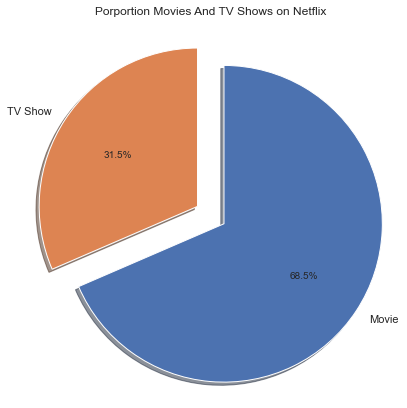

''

In [197]:
# Use the `color` argument
con=df['type'].value_counts()

# g = plt.pie(con,explode=(0.025,0.025), labels=df.type.value_counts().index, colors=[‘red’,’black’],autopct=’%1.1f%%’, startangle=180)
explode = (0, 0.2)  # only "explode" the 2nd slice (i.e. 'Hogs')
plt.figure(figsize=(12,7))

plt.pie(con,labels=con.index,startangle=90,autopct='%1.1f%%',counterclock=False,explode=explode,shadow=True,)
plt.title('Porportion Movies And TV Shows on Netflix')
plt.axis('square')
plt.show()
;

>>###  <span style="color:blue"> (68,4%) Movies and (31,6%) TV Shows,that means most of shows from the movies.</span>

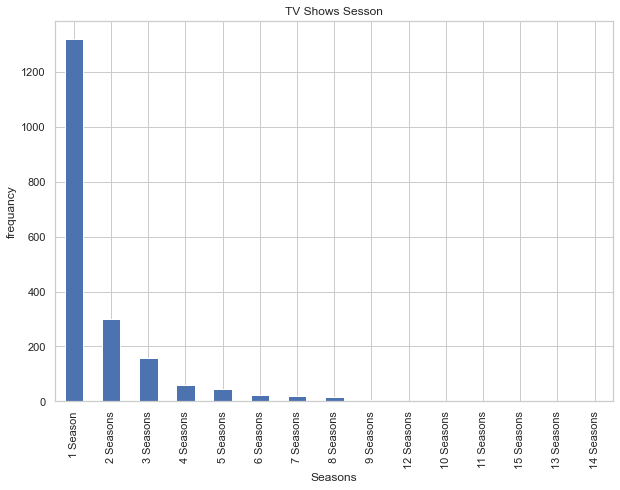

In [198]:
#Check most of Tv show how many season comman
plt.figure(figsize=(10,7))

df_tvshow.duration.value_counts().plot(kind='bar')
plt.xlabel('Seasons')
plt.ylabel('frequancy')
plt.title('TV Shows Sesson');


>>### <span style="color:blue">Most of TV Shows have one Season</span>

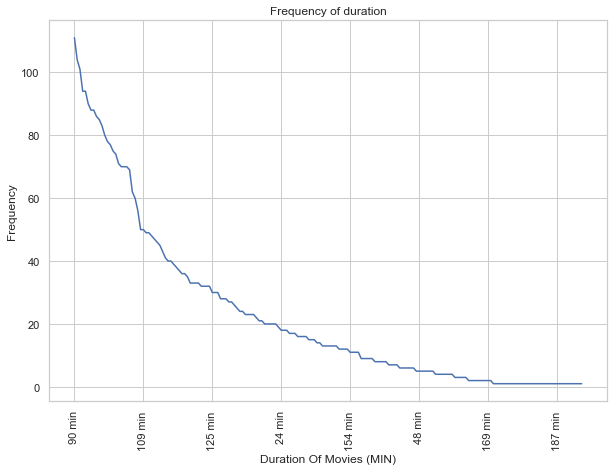

In [199]:
# Check most of the Movies  how many common movies have same duration ?
plt.figure(figsize=(10,7))
df_movies.duration.value_counts().plot()
plt.xticks(rotation=90);
plt.xlabel('Duration Of Movies (MIN)')
plt.ylabel('Frequency')
plt.title('Frequency of duration');

>>### <span style="color:blue">Most of Movies have 90 Min's duration</span>

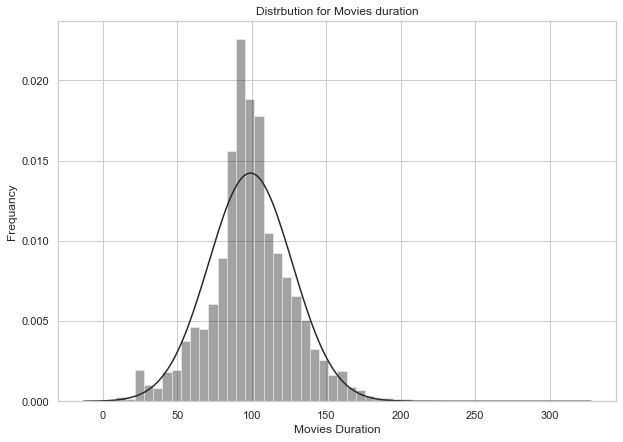

In [200]:
# extract number of time and make normal distribution for movies time almost average time 100 MIN's
plt.figure(figsize=(10,7))

sb.distplot(df_movies['duration'].str.extract('(\d+)'),fit=norm,kde=False,color=['k'])
plt.xlabel('Movies Duration')
plt.ylabel('Frequancy')
plt.title('Distrbution for Movies duration');


>>## <span style="color:blue">Most of the average duration for movies 100 Min's,Netflix shloud care about duration when add new movies.</span>

#  <span style="color:red">2.Which country has high production content of Netflix?</span> 

## We need to separate all countries before analyzing it.

In [201]:
all_countries = df.set_index('title').country.str.split(',', expand=True).stack().reset_index(level=1, drop=True);
all_countries

title
Norm of the North: King Sized Adventure     United States
Norm of the North: King Sized Adventure             India
Norm of the North: King Sized Adventure       South Korea
Norm of the North: King Sized Adventure             China
Jandino: Whatever it Takes                 United Kingdom
                                                ...      
Talking Tom and Friends                          Thailand
Pokémon the Series                                  Japan
Justin Time                                        Canada
Terrace House: Boys & Girls in the City             Japan
Weeds                                       United States
Length: 7638, dtype: object

### Removing titles with no countries available.

In [202]:
all_countries=all_countries[all_countries !='Country Unavailable']

## top Countries producted Movies and TV Shows

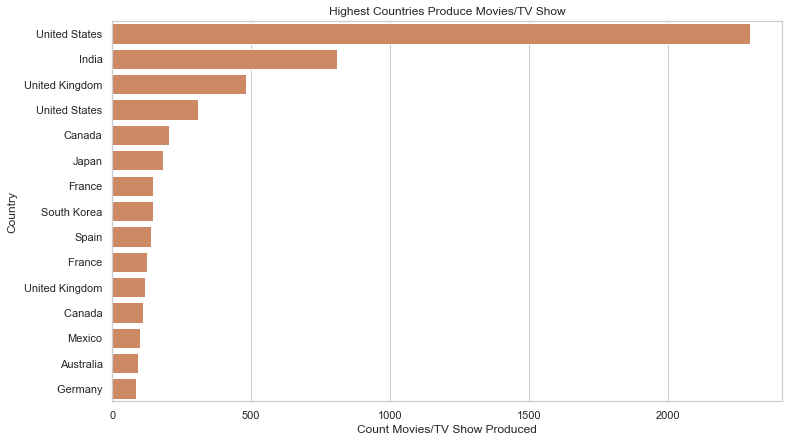

In [203]:
base_color = sb.color_palette()[1]
plt.figure(figsize=(12,7))

sb.countplot(y = all_countries, order=all_countries.value_counts().index[:15],color=base_color)
plt.xlabel('Count Movies/TV Show Produced')
plt.ylabel('Country')
plt.title('Highest Countries Produce Movies/TV Show')

plt.show()

>## <span style="color:blue">From the Horizontal bar chart we can see the United States, Inda, and the United Kingdom the highest 3 countries produce content on Netflix.</span>

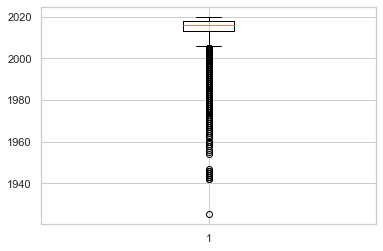

In [204]:
## Check 5 number summary and outlier for release years for movies and tv shows 
plt.boxplot(df['release_year']);


# Outliers data here is not erorr, it just recorded date for released content not anomalous or wrong data,beacuse it recorded from along time 

Text(0, 0.5, 'Count Movies/TV Show produced')

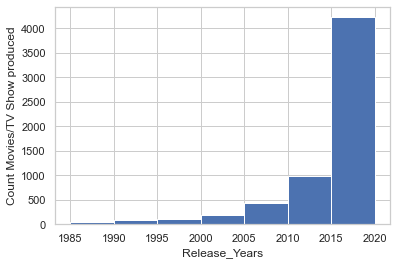

In [205]:
#Ploting Histogram to check data skewed

bins=np.arange(1985,2020+5,5)
plt.hist(df['release_year'],bins=bins);
plt.xlabel('Release_Years')
plt.ylabel('Count Movies/TV Show produced')

### <span style="color:blue">Left skewed Histogram for data  mean < median < mode  indcate increaseing content produce  from 1990 with high release  at 2019</span>

Text(0.5, 0, 'added_year')

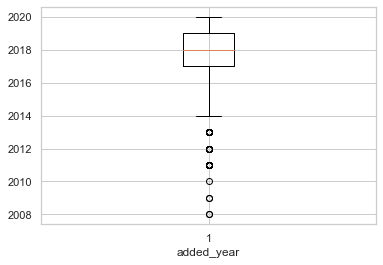

In [206]:
## Check 5 number summary and outlier for added years for movies and tv shows on Netflix

plt.boxplot(df['added_year']);
plt.xlabel('added_year')

>## <span style="color:blue">Same for Added_Year Outliers data here is not erorr, it just recorded date for added years  content on netflix, not anomalous or wrong data.</span>

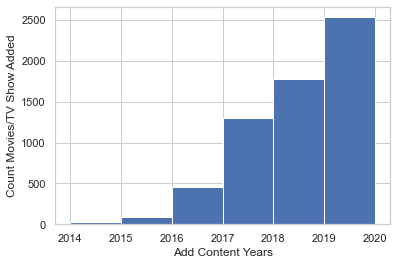

In [207]:
#Ploting Histogram to check data skewed
bins=np.arange(2014,2021,1)
plt.hist(df['added_year'],bins=bins);
plt.xlabel("Add Content Years")
plt.ylabel('Count Movies/TV Show Added');


>### <span style="color:blue">Left skewwed Histogram for data  mean < median < mode  indcate increaseing content added from 2015 with high added at 2019</span>

# *Bivariate Exploration*

## <span style="color:red">3.Which day of the week has high increasing content (Movies and TV Show)add?</span>

Text(0.5, 1.0, 'Relation Between Day and Type of content')

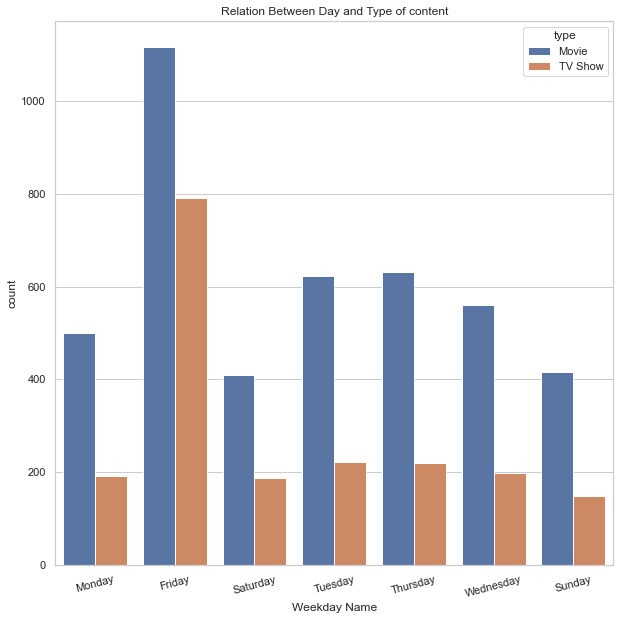

In [208]:
#Ploting seaborn countplot to Show the counts of observations in each categorical bin using bars.
fig, ax = plt.subplots(figsize=(10,10))

sb.countplot(data=df,x='added_day_name',hue='type',ax=ax)
plt.xticks(rotation=15);
plt.xlabel('Weekday Name')
plt.title('Relation Between Day and Type of content')


>>## <span style="color:blue">Highest day Friday for added movies and TV Show </span>

# <span style="color:red">4.Which type content rate highest for movies and tv show?</span>

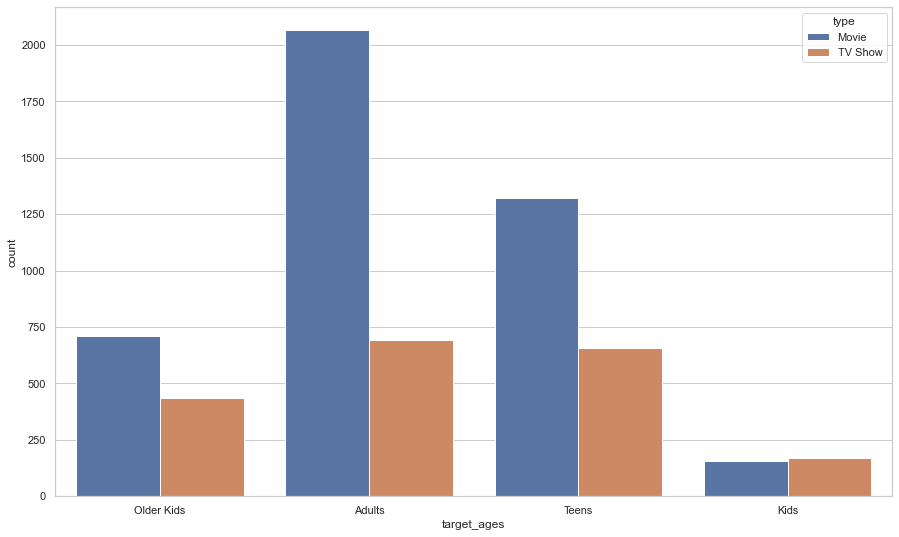

In [209]:
plt.figure(figsize=(15,9))
sb.countplot(data = df, x = 'target_ages', hue = 'type')
#plt.xticks(rotation = 20);

>>## <span style="color:blue">Adult Movies the highest rate for movies and for TV show the highest rate Adult and Teens rate.</span>

# <span style="color:red">5.What the highest year for release content Movies and TV Show?</spain>

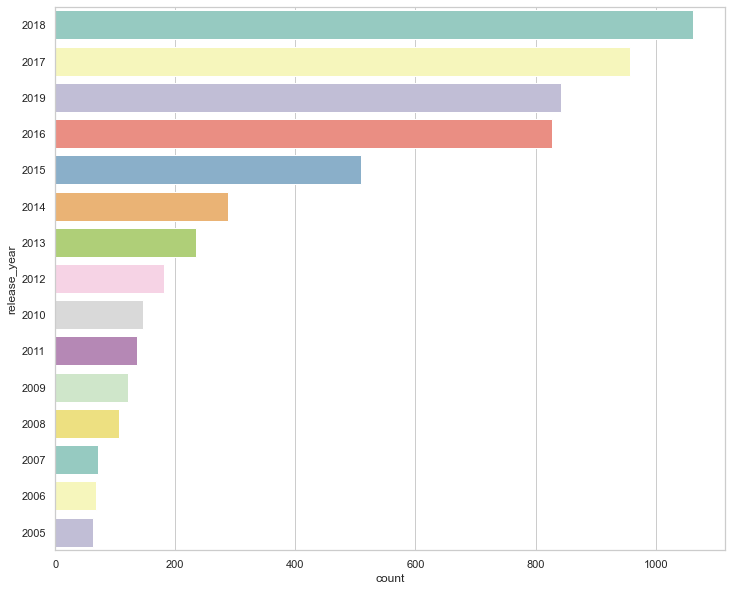

In [210]:
plt.figure(figsize=(12,10))
sb.set(style="whitegrid")

ax = sb.countplot(y='release_year', data=df, palette="Set3", order=df['release_year'].value_counts().index[0:15])

>>### <span style="color:blue">2018 the highest year for release content.</span>

# <span style="color:red">6.What the highest year for to added content on Netflix?</span>

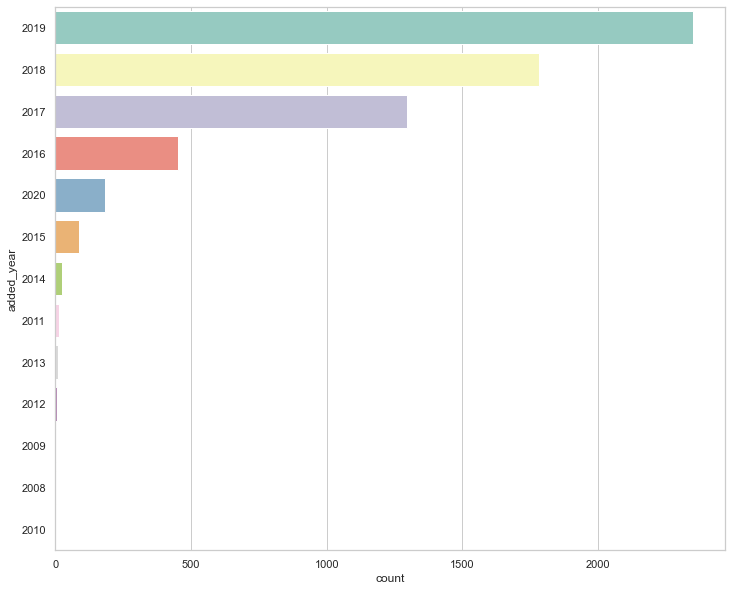

In [211]:
plt.figure(figsize=(12,10))

ax = sb.countplot(y='added_year', data=df, palette="Set3", order=df['added_year'].value_counts().index[0:15])


>>### 2019 highest years for add content in Netflex

# *Multivariate Exploration*

# <span style="color:red"> 7.What relation between released years and added years for Movies and TV Show on Netflix?</span>

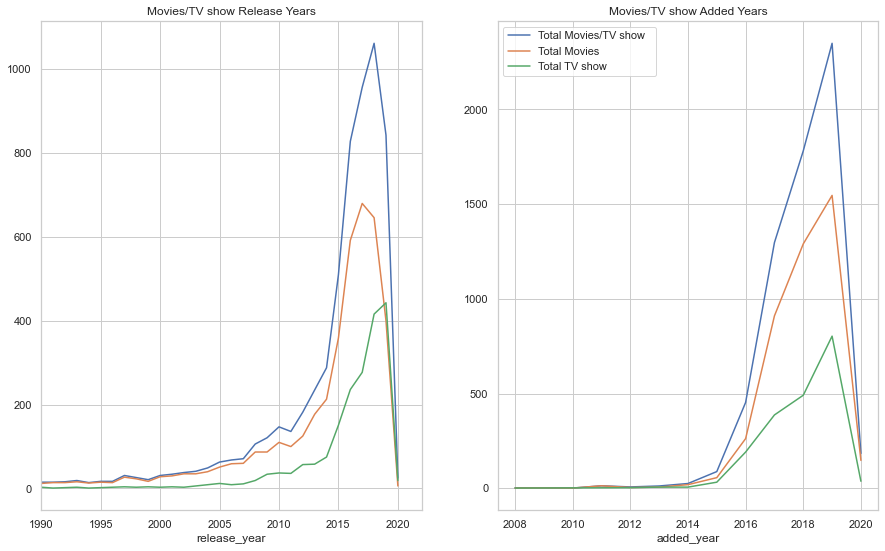

In [212]:
#Plotting line to get realtion between releasd movies and TVshow per year 
plt.figure(figsize=(15,9))
plt.subplot(1, 2, 1)

df.groupby('release_year')["type"].count().plot(label="Total Movies/TV show ")
df_movies.groupby('release_year')["type"].count().plot(label="Total Movies ")
df_tvshow.groupby('release_year')["type"].count().plot(label="Total TV show ")
plt.title("Movies/TV show Release Years")
plt.xlim([1990, 2022])

#Plotting line to get realtion between added  movies and TVshow on Netflix per year and correleting with release plot 

plt.subplot(1, 2, 2)
bins=np.arange(1970,2020,10)
df.groupby('added_year')["type"].count().plot(label="Total Movies/TV show  ")
df_movies.groupby('added_year')["type"].count().plot(label="Total Movies   ")
df_tvshow.groupby('added_year')["type"].count().plot(label="Total TV show  ")
plt.title("Movies/TV show Added Years")
plt.legend()


>>###  <span style="color:blue">Produce Movies and TV Show increased  from 2000 and got high peak at 2018, But Netflix added content increased from 2014, reached high peak 2019.</span>

C:\Users\Mahmoud\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


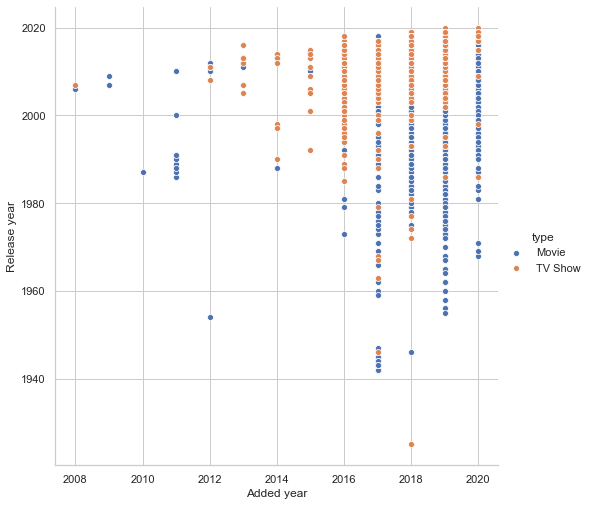

In [213]:
# Ploting scatter for release years and added years on netflex
g = sb.FacetGrid(df,hue="type",size=7)
g.map_dataframe(sb.scatterplot, x="added_year", y="release_year")
g.set_axis_labels('Added year','Release year')
g.add_legend();

>>### <span style="color:blue">Produce Movies and TV Show increased from 2000 and got high peak at 2018, But Netflix added content increased from 2014, reached high peak 2019.¶</span>

## <span style="color:brown">Conclustion from dataset</span>

> Most content watched by adults

> Movies content in Netflex more than TV SHows

> Most Tv Show has one season 

>Most of Mean time for movies 100 Min's

> Produce Movies and TV Show increased from 2000 and got high peak at 2018, But Netflix added content increased from 2014, reached high peak 2019.¶




In [214]:
###Thanks Udacity 